In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import re

In [3]:
df = pd.read_csv('winemag-data-130k-v2.csv')

Import all needed libraries, try to open .csv and read

In [4]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


OK, let's find all types of riesling:

In [5]:
df.variety.value_counts()

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 707, dtype: int64

In [6]:
df.variety.nunique()

707

In [7]:
types = df.variety.unique()
types

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

Well, that's a plenty of wines we have here. We'll use powerful regular expressions to find all sorts or Rieslng.

In [8]:
type(types)

numpy.ndarray

In [9]:
for i in range(len(types)):
#    if i%100==0:
#        print(types[i])
#        print(type(types[i]))
    try:
        re.search('riesling', types[i].lower())
        if re.search('riesling', types[i].lower()):
            print(types[i])
    except AttributeError:
        print(f'Strange type!!! - {types[i]}')

Riesling
Welschriesling
Gewürztraminer-Riesling
Johannisberg Riesling
White Riesling
Riesling-Chardonnay
Chardonnay-Riesling
Schwartzriesling
Strange type!!! - nan


First of all you should clear your data of NAN or instead look carefuly through columns. Next time :)
I used try-except to get rid of strange type, my first thought was may be the number is one of wine variety but it's just NaN for sure.

In [10]:
sorts = []
for i in range(len(types)):
    try:
        re.search('riesling', types[i].lower())
        if re.search('riesling', types[i].lower()):
            sorts.append(types[i])
    except AttributeError:
        pass
print(sorts)

['Riesling', 'Welschriesling', 'Gewürztraminer-Riesling', 'Johannisberg Riesling', 'White Riesling', 'Riesling-Chardonnay', 'Chardonnay-Riesling', 'Schwartzriesling']


In [11]:
df[df['variety']=='Riesling']

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
15,15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
47,47,US,This is a sweet wine with flavors of white sug...,NaN,86,13.0,California,Lake County,NaN,NaN,NaN,The White Knight 2011 Riesling (Lake County),Riesling,The White Knight
76,76,Germany,Earthy pollen and mineral notes lend a savory ...,NaN,86,9.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Schmitt Söhne 2015 Riesling (Rheinhessen),Riesling,Schmitt Söhne
85,85,Germany,"Pronounced dust, pollen and earth tones lend s...",Undone Dry,86,10.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,P.J. Valckenberg 2015 Undone Dry Riesling (Rhe...,Riesling,P.J. Valckenberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129918,129918,Germany,"Despite plenty of honeyed sweetness, this wine...",Wehlener Sonnenuhr Spätlese,91,32.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Loosen 2006 Wehlener Sonnenuhr Spätlese Ri...,Riesling,Dr. Loosen
129923,129923,Germany,"Thick, oily and sweet, this wine is clearly no...",Erdener Treppchen Spätlese*,91,24.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Stephan Ehlen 2006 Erdener Treppchen Spätlese*...,Riesling,Stephan Ehlen
129924,129924,Germany,Imagine honeyed orange sections—that's what th...,Bernkasteler alte Badstube am Doctorberg Spätlese,91,31.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Pauly Bergweiler 2006 Bernkasteler alte Ba...,Riesling,Dr. Pauly Bergweiler
129946,129946,Germany,"Plump, clingy peach and honey notes are cut wi...",Dom,90,17.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Bischöfliche Weingüter Trier 2013 Dom Riesling...,Riesling,Bischöfliche Weingüter Trier


In [12]:
df[df['variety'].isin(sorts)]

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
15,15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
47,47,US,This is a sweet wine with flavors of white sug...,NaN,86,13.0,California,Lake County,NaN,NaN,NaN,The White Knight 2011 Riesling (Lake County),Riesling,The White Knight
76,76,Germany,Earthy pollen and mineral notes lend a savory ...,NaN,86,9.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Schmitt Söhne 2015 Riesling (Rheinhessen),Riesling,Schmitt Söhne
85,85,Germany,"Pronounced dust, pollen and earth tones lend s...",Undone Dry,86,10.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,P.J. Valckenberg 2015 Undone Dry Riesling (Rhe...,Riesling,P.J. Valckenberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129918,129918,Germany,"Despite plenty of honeyed sweetness, this wine...",Wehlener Sonnenuhr Spätlese,91,32.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Loosen 2006 Wehlener Sonnenuhr Spätlese Ri...,Riesling,Dr. Loosen
129923,129923,Germany,"Thick, oily and sweet, this wine is clearly no...",Erdener Treppchen Spätlese*,91,24.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Stephan Ehlen 2006 Erdener Treppchen Spätlese*...,Riesling,Stephan Ehlen
129924,129924,Germany,Imagine honeyed orange sections—that's what th...,Bernkasteler alte Badstube am Doctorberg Spätlese,91,31.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Pauly Bergweiler 2006 Bernkasteler alte Ba...,Riesling,Dr. Pauly Bergweiler
129946,129946,Germany,"Plump, clingy peach and honey notes are cut wi...",Dom,90,17.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Bischöfliche Weingüter Trier 2013 Dom Riesling...,Riesling,Bischöfliche Weingüter Trier


Well, let's see how much values I could miss:

In [13]:
diff = len(df[df['variety'].isin(sorts)]) - len(df[df['variety']=='Riesling'])
print(diff)
print(diff/len(df[df['variety'].isin(sorts)])*100)

57
1.0865421273351126


In [14]:
df_riesling = df[df['variety'].isin(sorts)]

In [15]:
df_riesling.sort_values(by=['points'], ascending=False).head(20)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
109406,109406,Austria,Opulent honey and lemon aromas waft from the g...,Zwischen den Seen Nummer 9 Trockenbeerenauslese,98,NaN,Burgenland,NaN,NaN,Roger Voss,@vossroger,Kracher 2008 Zwischen den Seen Nummer 9 Trocke...,Welschriesling,Kracher
16522,16522,Germany,"With layers upon layers of spicy saffron, peac...",Kiedrich Gräfenberg Trockenbeerenauslese,98,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,NaN,Robert Weil 2015 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil
102484,102484,Germany,Lip-smacking is an inelegant yet apt word to d...,Wehlener Sonnenuhr Trockenbeerenauslese Erste ...,97,440.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,S.A. Prüm 2006 Wehlener Sonnenuhr Trockenbeere...,Riesling,S.A. Prüm
128266,128266,Germany,While sometimes the Pauly-Bergweiler wines com...,Bernkasteler Badstube Trockenbeerenauslese,97,250.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Pauly Bergweiler 2007 Bernkasteler Badstub...,Riesling,Dr. Pauly Bergweiler
117028,117028,Germany,"Even in a flight of top BAs and TBAs, this one...",Trockenbeerenauslese,97,445.0,Rheingau,NaN,NaN,Joe Czerwinski,@JoeCz,Schloss Johannisberger 2009 Trockenbeerenausle...,Riesling,Schloss Johannisberger
117029,117029,Germany,Hugely sweet yet reasonably balanced given its...,Kiedrich Gräfenberg Trockenbeerenauslese,97,612.0,Rheingau,NaN,NaN,Joe Czerwinski,@JoeCz,Robert Weil 2009 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil
127371,127371,Germany,Exceeds even this producer's stunning beerenau...,Deidesheimer Hohenmorgen Trockenbeerenauslese ...,97,245.0,Pfalz,NaN,NaN,Joe Czerwinski,@JoeCz,Geh. Rat Dr. von Bassermann-Jordan 2008 Deides...,Riesling,Geh. Rat Dr. von Bassermann-Jordan
67097,67097,Germany,So incredibly thick and sweet it's almost chew...,Trockenbeerenauslese Goldlack,97,486.0,Rheingau,NaN,NaN,Joe Czerwinski,@JoeCz,Schloss Johannisberger 2006 Trockenbeerenausle...,Riesling,Schloss Johannisberger
14344,14344,Germany,"The smoky, minerally aspects of the site show ...",Breumel in den Mauren Trockenbeerenauslese,97,NaN,Pfalz,NaN,NaN,Joe Czerwinski,@JoeCz,Müller-Catoir 2007 Breumel in den Mauren Trock...,Riesling,Müller-Catoir
347,347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil


Now, I have DF with Riesling only
Next steps:
1) A bit visualisations:
distrbtions by country, province, variety, average score by country.
2) Find out what wine I have tried, mark it and visualise

In [16]:
countries = df_riesling['country'].value_counts()
countries

country
Germany           1792
US                1779
France             718
Austria            603
Australia          151
New Zealand         57
Canada              55
Chile               25
Italy               24
South Africa         8
Portugal             5
Slovenia             4
Romania              4
Serbia               3
Bulgaria             3
Argentina            2
Israel               2
Luxembourg           2
Croatia              2
Czech Republic       2
Slovakia             1
Spain                1
Moldova              1
Ukraine              1
Name: count, dtype: int64

Text(0.5, 0, 'Amount of riesling')

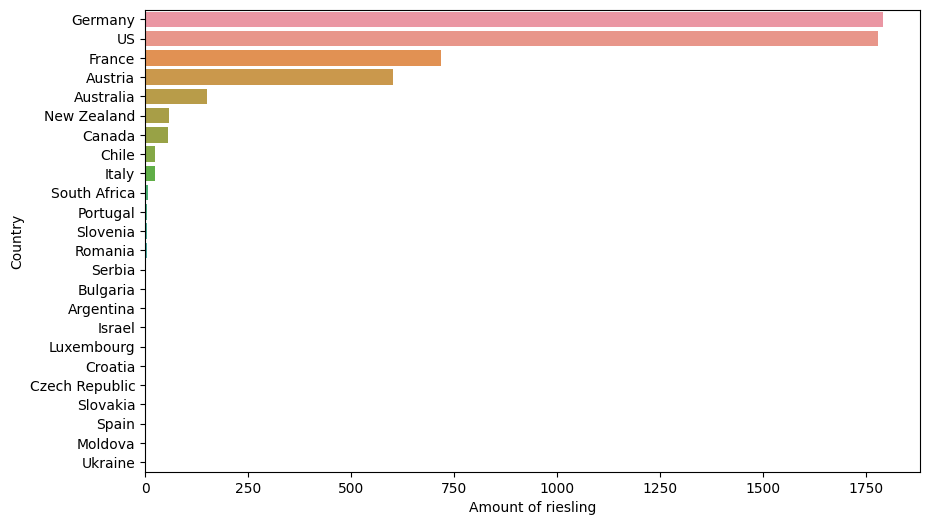

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.barplot(y=countries.index, x=countries, ax=ax)
ax.set_ylabel('Country')
ax.set_xlabel('Amount of riesling')

In [19]:
germany = df_riesling[df_riesling['country']=='Germany']
germany

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
15,15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
76,76,Germany,Earthy pollen and mineral notes lend a savory ...,NaN,86,9.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Schmitt Söhne 2015 Riesling (Rheinhessen),Riesling,Schmitt Söhne
85,85,Germany,"Pronounced dust, pollen and earth tones lend s...",Undone Dry,86,10.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,P.J. Valckenberg 2015 Undone Dry Riesling (Rhe...,Riesling,P.J. Valckenberg
148,148,Germany,"Crisp, pristine peach and apricot notes resona...",Dry,91,16.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Weingut Liebfrauenstift 2014 Dry Riesling (Rhe...,Riesling,Weingut Liebfrauenstift
156,156,Germany,Approachably fruity yet nuanced and electrifyi...,Graacher Himmelreich Spätlese,91,14.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Carl Graff 2014 Graacher Himmelreich Spätlese ...,Riesling,Carl Graff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129918,129918,Germany,"Despite plenty of honeyed sweetness, this wine...",Wehlener Sonnenuhr Spätlese,91,32.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Loosen 2006 Wehlener Sonnenuhr Spätlese Ri...,Riesling,Dr. Loosen
129923,129923,Germany,"Thick, oily and sweet, this wine is clearly no...",Erdener Treppchen Spätlese*,91,24.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Stephan Ehlen 2006 Erdener Treppchen Spätlese*...,Riesling,Stephan Ehlen
129924,129924,Germany,Imagine honeyed orange sections—that's what th...,Bernkasteler alte Badstube am Doctorberg Spätlese,91,31.0,Mosel-Saar-Ruwer,NaN,NaN,Joe Czerwinski,@JoeCz,Dr. Pauly Bergweiler 2006 Bernkasteler alte Ba...,Riesling,Dr. Pauly Bergweiler
129946,129946,Germany,"Plump, clingy peach and honey notes are cut wi...",Dom,90,17.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Bischöfliche Weingüter Trier 2013 Dom Riesling...,Riesling,Bischöfliche Weingüter Trier


In [29]:
mean_score = df_riesling.groupby('country')['points'].mean().sort_values(ascending = False)
mean_score

country
Austria           91.363184
France            90.426184
Germany           90.092634
Moldova           90.000000
Israel            89.500000
Canada            89.309091
Australia         88.920530
Luxembourg        88.000000
Ukraine           88.000000
US                87.955593
New Zealand       87.877193
South Africa      87.875000
Italy             87.833333
Slovenia          87.250000
Serbia            87.000000
Slovakia          87.000000
Czech Republic    86.500000
Portugal          86.400000
Chile             86.240000
Argentina         86.000000
Bulgaria          85.333333
Croatia           84.500000
Romania           84.250000
Spain             82.000000
Name: points, dtype: float64

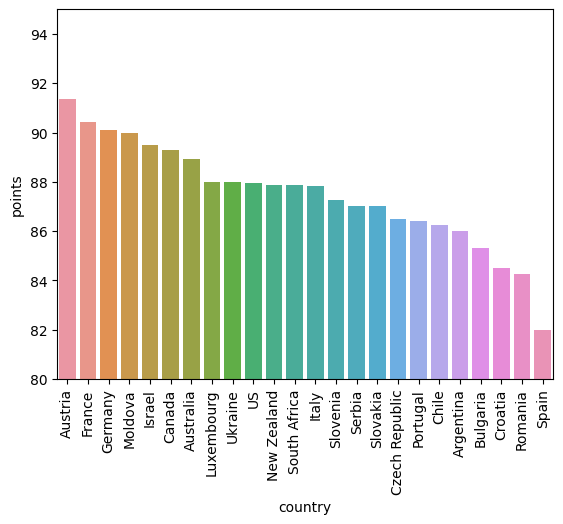

In [38]:
g = sns.barplot(x=mean_score.index, y=mean_score)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set(ylim=(80, 95));

Распределение средних оценок рислинга по странам

In [39]:
germany['province'].value_counts()

province
Mosel               1011
Rheingau             299
Rheinhessen          183
Pfalz                106
Mosel-Saar-Ruwer     104
Nahe                  73
Mittelrhein            5
Germany                4
Franken                4
Landwein Rhein         2
Württemberg            1
Name: count, dtype: int64

In [40]:
mean_score_germ = germany.groupby('province')['points'].mean().sort_values(ascending = False)
mean_score_germ

province
Mittelrhein         92.000000
Rheingau            91.030100
Mosel               90.082097
Franken             90.000000
Nahe                89.835616
Mosel-Saar-Ruwer    89.769231
Pfalz               89.641509
Rheinhessen         89.185792
Landwein Rhein      89.000000
Germany             88.250000
Württemberg         87.000000
Name: points, dtype: float64

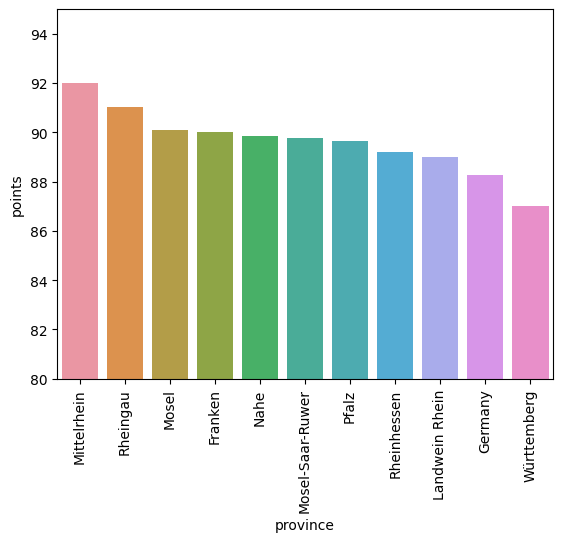

In [41]:
g = sns.barplot(x=mean_score_germ.index, y=mean_score_germ)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
g.set(ylim=(80, 95));

Распределение средних оценок рислинга по провинциям Германии

In [42]:
au = df_riesling[df_riesling['country']=='Australia']

In [43]:
first = r'Frankland Estate'
second = r'Glaetzer-Dixon'

Пытаюсь найти итальянский рислинг Malat Riesling Steinbuhel 2017, про который мне известно что он из региона Фриули-Джулия, Венеция.

In [48]:
df_riesling[(df_riesling['country']=='Italy') & (df_riesling['region_1']=='Venezia Giulia')]

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
17815,17815,Italy,"Made in a late harvest, sweet style, this has ...",Riesling,86,25.0,Northeastern Italy,Venezia Giulia,NaN,NaN,NaN,Marco Cecchini 2006 Riesling Riesling (Venezia...,Riesling,Marco Cecchini


Что ж, такого в базе нет

Ищу рислинг Frankland Estate Rocky Gully Riesling  2021, про который мне известно, что он из Австралии, Франклэнд Ривер. Также в таблице я его уже заметил (после фильтрации по региону), поэтому вписал название в поиск

In [53]:
au[(au['region_1']=='Frankland River') & (au['designation']=='Rocky Gully')]

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
38102,38102,Australia,As a straightahead Aussie Riesling for drinkin...,Rocky Gully,89,25.0,Western Australia,Frankland River,NaN,Joe Czerwinski,@JoeCz,Frankland Estate 2012 Rocky Gully Riesling (Fr...,Riesling,Frankland Estate
102125,102125,Australia,This vintage of Rocky Gully Riesling comes acr...,Rocky Gully,91,25.0,Western Australia,Frankland River,NaN,Joe Czerwinski,@JoeCz,Frankland Estate 2014 Rocky Gully Riesling (Fr...,Riesling,Frankland Estate


Достойное вино, с оценкой 89 и 91!

И еще одно австралийское, с Тасмании, Glaetzer-Dixon UUberbank Riesling 2021

In [54]:
au[(au['region_1']=='Tasmania')]

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
34160,34160,Australia,"This Riesling starts out strong, with a likabl...",Devil's Corner,84,16.0,Tasmania,Tasmania,NaN,NaN,NaN,Tamar Ridge 2008 Devil's Corner Riesling (Tasm...,Riesling,Tamar Ridge
77691,77691,Australia,"A fresh and crisp, though unusual, wine. It ha...",NaN,87,19.0,Tasmania,Tasmania,NaN,NaN,NaN,Pipers Brook Vineyard Estate 2002 Riesling (Ta...,Riesling,Pipers Brook Vineyard Estate
77700,77700,Australia,"Smooth on the palate, though perhaps not as cr...",NaN,87,16.0,Tasmania,Tasmania,NaN,NaN,NaN,Ninth Island 2001 Riesling (Tasmania),Riesling,Ninth Island


Фильтрация по региону показывает нам, что данного вина в базе нет(